## Day 08, Day 09
14/Dec/2021 (Tuesday), 16/Dec/2021 (Thursday)

In [17]:
%matplotlib qt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits import mplot3d

In [20]:
X, y, coef  = make_regression(n_samples=200, n_features=2, bias=3, noise=12, coef=True)
y = y.reshape(-1,1)
print(X.shape, y.shape, coef)

(200, 2) (200, 1) [25.79666317 32.15792255]


In [3]:
X[:5, :]

array([[ 3.69878973e-01, -5.79412757e-02],
       [ 8.08134856e-04, -4.26971843e-01],
       [ 1.26345475e+00, -2.16479953e+00],
       [-9.23269421e-01, -3.60609947e-01],
       [-9.36437466e-01,  9.67814845e-01]])

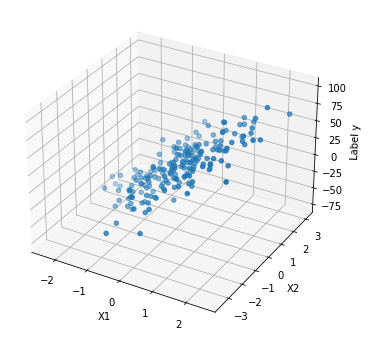

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")

plt.show()

In [60]:
class LinearRegressor:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return X.dot(self.w)
    
    def loss(self, y, y_hat):
        return (y-y_hat).T.dot(y-y_hat)[0][0]
    
    def r_squared(self, y, y_hat):
        e_method = self.loss(y, y_hat)
        e_baseline = self.loss(y, y.mean())
        return 1-(e_method/e_baseline)
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -2*((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            r2 = self.r_squared(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)
        
        

In [61]:
lr = LinearRegressor()
epochs = 100
losses = lr.fit(X, y.reshape(-1,1), epochs=epochs, learning_rate=0.001, method='batch')

Epoch: 1/100 Loss: 131951.5742038602, r2: 0.6652379316337598, SoR: 421.3926319287118
Epoch: 2/100 Loss: 57701.88073977514, r2: 0.8536099242345823, SoR: 169.45100568994025
Epoch: 3/100 Loss: 35685.688159054254, r2: 0.9094651590837317, SoR: 60.90675034565422
Epoch: 4/100 Loss: 29041.353861545696, r2: 0.926321881754689, SoR: 17.22779752548652
Epoch: 5/100 Loss: 26990.28298001851, r2: 0.931525462953387, SoR: 1.6271034405412763
Epoch: 6/100 Loss: 26339.08218442419, r2: 0.9331775639349039, SoR: -2.6189918702117083
Epoch: 7/100 Loss: 26125.28538657247, r2: 0.9337199679091706, SoR: -2.794573919269183
Epoch: 8/100 Loss: 26052.380344337984, r2: 0.9339049285121797, SoR: -1.8687885750379394
Epoch: 9/100 Loss: 26026.494604564472, r2: 0.9339706008153716, SoR: -0.9178673399368478
Epoch: 10/100 Loss: 26016.92533104839, r2: 0.9339948781293358, SoR: -0.23870204687509755
Epoch: 11/100 Loss: 26013.25178741552, r2: 0.9340041979352736, SoR: 0.1588332548490925
Epoch: 12/100 Loss: 26011.793851271614, r2: 0.93

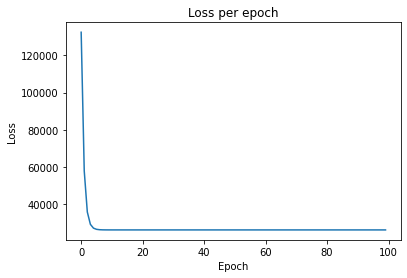

In [48]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

In [49]:
lr.w

array([[ 3.9264152 ],
       [25.18868749],
       [31.4568609 ]])

In [50]:
coef

array([25.79666317, 32.15792255])

In [55]:
lr = LinearRegressor()
epochs = 100
losses = lr.fit(X, y.reshape(-1,1), epochs=epochs, learning_rate=0.01, method='batch')

Epoch: 1/100 Loss: 4669391.433340236, r2: -10.846278785742987, SoR: -4797.70849274546
Epoch: 2/100 Loss: 61730055.634785116, r2: -155.60958370028453, SoR: 21198.32772554225
Epoch: 3/100 Loss: 829660839.2050862, r2: -2103.8553626625867, SoR: -89855.82052660234
Epoch: 4/100 Loss: 11232671424.089962, r2: -28496.36611248941, SoR: 369276.6222885004
Epoch: 5/100 Loss: 152734880253.9309, r2: -387488.46144804807, SoR: -1482794.1392351845
Epoch: 6/100 Loss: 2082440828357.7173, r2: -5283165.973622525, SoR: 5850276.06572276
Epoch: 7/100 Loss: 28442460943786.926, r2: -72158721.71639462, SoR: -22773369.49217437
Epoch: 8/100 Loss: 388917440938845.1, r2: -986686271.8840721, SoR: 87732415.00594188
Epoch: 9/100 Loss: 5321979745289746.0, r2: -13501899904.975595, SoR: -335251635.8274566
Epoch: 10/100 Loss: 7.286242496475056e+16, r2: -184852482696.14322, SoR: 1272966007.2059402
Epoch: 11/100 Loss: 9.978742131136429e+17, r2: -2531613870972.318, SoR: -4809269974.182053
Epoch: 12/100 Loss: 1.3669157561705568

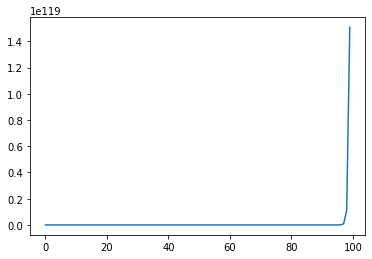

In [56]:
plt.plot(losses)
plt.show() ## outward oscillation